In [4]:
!pip install imgaug

In [113]:
%matplotlib inline

import numpy as np
import glob
import imgaug as ia
from imgaug import augmenters as iaa
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random 

In [126]:
preprocessing_stages = {"filter_black":{"threshold":0.1}, 
                        "swap_channels":{"src_ch":1, "dst_ch":2},
                        "imgaug":{
                            "sometimes":0.5,
                            "flip_lr":0.5,
                            "flip_ud":0.2,
                            "brightness":(0.5, 1.5),
                            "contrast_normalization":(0.5, 2.0),
                            "crop_to_size":[224, 224],
                            "resize":[300, 300],
                            "sharpen":{"alpha":(0, 1.0), "lightness":(0.75, 1.5)}
                        }
                       }

In [127]:
def is_crappy_image(image, threshold):
        pixels_number = image.shape[0] * image.shape[1]
        bad_pixels_num = pixels_number - cv2.countNonZero(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
        if (bad_pixels_num/pixels_number < threshold):
            return False
        else:
            return True

In [128]:
def swap_channels(image, src_channel, dest_channel):
    src = image[:, :, src_channel]
    dest = image[:, :, dest_channel]
    image[:, :, dest_channel] = src
    image[:, :, src_channel] = dest
    return image

In [135]:
def preprocess_images(image_path_list, preprocessing_stages):
    img_list = []
    img_path_list = []    
    
    for image_file in image_path_list:
        image = mpimg.imread(image_file)
        img_list.append(image)
        img_path_list.append(image_file)
        
    for stage in preprocessing_stages:
        params =  preprocessing_stages[stage]
        if (stage == "filter_black"):
            idx_to_remove = []
            for i in range(len(img_list)):
                threshold = params["threshold"]
                res = is_crappy_image(img_list[i], threshold)
                if (res == True):
                    idx_to_remove.append(i)
                    
            for idx in idx_to_remove:
                img_list.pop(idx)
                img_path_list.pop(idx)
                
        if (stage == "swap_channels"):
            src_channel = params["src_ch"]
            dest_channel = params["dst_ch"]
            for i in range(len(img_list)):
                img_list[i] = swap_channels(img_list[i], src_channel, dest_channel)
        
        if (stage == "imgaug"):
            # https://imgaug.readthedocs.io/en/latest/source/examples_basics.html#heavy-augmentations
            random_state_init = random.randint(0, 1000)
            ia.seed(random_state_init)
            
            sometimes = lambda aug: iaa.Sometimes(params["sometimes"], aug)
            
            seq = iaa.Sequential([
                            # Resize
                            iaa.Resize({"height": params["resize"][0], 
                                        "width": params["resize"][1]}),
                            # horizontally flip 50% of all images
                            iaa.Fliplr(params["flip_lr"]),
                            # vertically flip 20% of all images
                            iaa.Flipud(params["flip_ud"]),
                            # Change brightness of images (50-150% of original value).
                            iaa.Multiply(params["brightness"], 
                                         per_channel=0.5),
                            # Improve or worsen the contrast of images.
                            iaa.ContrastNormalization(params["contrast_normalization"], 
                                                      per_channel=0.5),
                            iaa.CropToFixedSize(width=params["crop_to_size"][0], 
                                                height=params["crop_to_size"][1]),
                            # Sharpen each image, overlay the result with the original
                            # image using an alpha between 0 (no sharpening) and 1
                            # (full sharpening effect).
                            sometimes( iaa.Sharpen(alpha=params["sharpen"]["alpha"], 
                                                   lightness=params["sharpen"]["lightness"]) 
                                     )
                
                    ],random_order=False)
            images_aug = seq(images=img_list)
            img_list = images_aug
            
    return img_path_list, img_list

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


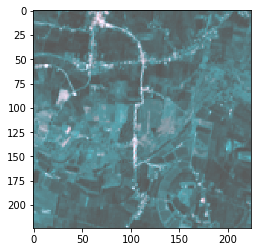

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


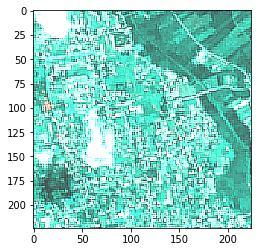

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


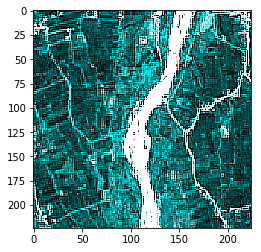

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


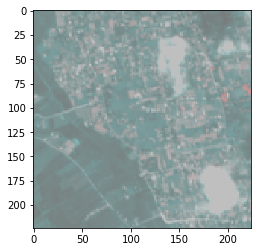

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


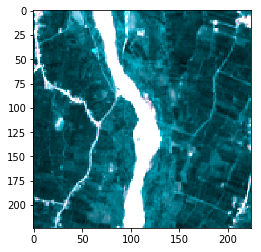

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


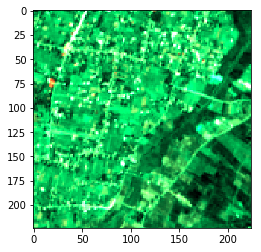

In [136]:
image_path_list = cars = glob.glob('data/*.png')
img_path_list, img_list = preprocess_images(image_path_list, preprocessing_stages)
for img in img_list:
    plt.imshow(img)
    plt.show()